In [1]:
import pandas as pd
import numpy as np

#import data
df = pd.read_csv("house-prices.csv")

#view data
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [2]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [3]:
# check no duplications in the data
df.duplicated().sum()

0

In [4]:
# review missing data by sorting columns by missing values
df.isna().sum().sort_values(ascending=False)

Pool QC         2418
Misc Feature    2340
Alley           2267
Fence           1941
Fireplace Qu    1186
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

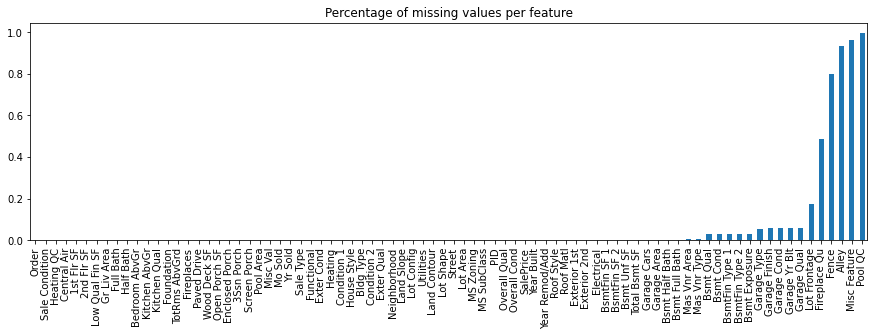

In [5]:
# visualise missing data per category
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

Only small amount of variables are missing data. Focus on those first.

In [6]:
# create list of variables with missing data
missing_data = pd.DataFrame(df.isna().sum(), columns=["sum"])
missing_data = missing_data[missing_data["sum"]>0]

missing_data.sort_values("sum", ascending=False)

,sum
Pool QC,2418
Misc Feature,2340
Alley,2267
Fence,1941
Fireplace Qu,1186
Lot Frontage,420
Garage Cond,138
Garage Qual,138
Garage Finish,138
Garage Yr Blt,138


In [7]:
# create variable list
missing_variables = missing_data.index.values

# display dataframe of these values
df_missing = df[missing_variables]
df_missing.head()

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,NaN,NaN,None,0.0,Gd,TA,No,GLQ,300.0,Unf,...,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,NaN,NaN,NaN
1,75.0,NaN,BrkFace,522.0,TA,TA,No,Unf,0.0,Unf,...,Attchd,1951.0,Unf,2.0,400.0,TA,TA,NaN,NaN,NaN
2,21.0,NaN,BrkFace,80.0,TA,TA,No,Unf,0.0,Unf,...,Attchd,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN
3,70.0,NaN,None,0.0,TA,TA,No,Rec,1018.0,Unf,...,Attchd,1959.0,RFn,2.0,447.0,TA,TA,NaN,NaN,NaN
4,60.0,NaN,None,0.0,TA,TA,No,Unf,0.0,Unf,...,Detchd,1960.0,Unf,1.0,308.0,TA,TA,NaN,MnPrv,NaN


In [8]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2010 non-null   float64
 1   Alley           163 non-null    object 
 2   Mas Vnr Type    2410 non-null   object 
 3   Mas Vnr Area    2410 non-null   float64
 4   Bsmt Qual       2359 non-null   object 
 5   Bsmt Cond       2359 non-null   object 
 6   Bsmt Exposure   2356 non-null   object 
 7   BsmtFin Type 1  2359 non-null   object 
 8   BsmtFin SF 1    2429 non-null   float64
 9   BsmtFin Type 2  2358 non-null   object 
 10  BsmtFin SF 2    2429 non-null   float64
 11  Bsmt Unf SF     2429 non-null   float64
 12  Total Bsmt SF   2429 non-null   float64
 13  Electrical      2429 non-null   object 
 14  Bsmt Full Bath  2428 non-null   float64
 15  Bsmt Half Bath  2428 non-null   float64
 16  Fireplace Qu    1244 non-null   object 
 17  Garage Type     2294 non-null   o

In [9]:
# select only categorical variables for review
missing_categorical = df_missing.select_dtypes(include="object").columns.values

# review subset
df_missing[missing_categorical].head()

,Alley,Mas Vnr Type,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,NaN,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,BuiltIn,Fin,TA,TA,NaN,NaN,NaN
1,NaN,BrkFace,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,TA,TA,No,Unf,Unf,SBrkr,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,TA,No,Rec,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,NaN,NaN
4,NaN,None,TA,TA,No,Unf,Unf,FuseF,Gd,Detchd,Unf,TA,TA,NaN,MnPrv,NaN


Reviewing all the documentation for the categorical variables it is clear that all missing vales are where there is none (ie no pool, no basement). Intuitive to replace all these missing values with 'None'.

In [10]:
# review missing values within the basement category

# filter garage columns
basement = []
for column in df.columns:
    if column.startswith("Bsmt"):
        basement.append(column)

# create new dataframe for this data        
bsmt = df[basement]

# if we can confirm that the 138 missing values of the categories with most missing captures all other missing values, safe to assume that simply all columns missing are a result of there being no gaage
bsmt_missing = bsmt[bsmt['Bsmt Exposure'].isna()]

# display sums of missing values within the subset
bsmt_missing.isna().sum()

Bsmt Qual         71
Bsmt Cond         71
Bsmt Exposure     74
BsmtFin Type 1    71
BsmtFin SF 1       1
BsmtFin Type 2    71
BsmtFin SF 2       1
Bsmt Unf SF        1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [11]:
# locate value which has type 2 values
df.loc[(df['Bsmt Exposure'].notnull()) & (df['BsmtFin Type 2'].isnull())]['Bsmt Exposure']

602    No
Name: Bsmt Exposure, dtype: object

In [12]:
df.iloc[602,:][basement]

Bsmt Qual             Gd
Bsmt Cond             TA
Bsmt Exposure         No
BsmtFin Type 1       GLQ
BsmtFin SF 1      1124.0
BsmtFin Type 2       NaN
BsmtFin SF 2       479.0
Bsmt Unf SF       1603.0
Bsmt Full Bath       1.0
Bsmt Half Bath       0.0
Name: 602, dtype: object

In [13]:
# replace values with missing 
df.loc[(df['Bsmt Exposure'].notnull()) & (df['BsmtFin Type 2'].isnull()), ['BsmtFin Type 2']] = 'Missing'

In [14]:
# review missing values within the garage category

# filter garage columns
garage = []
for column in df.columns:
    if column.startswith("Garage"):
        garage.append(column)

# create new dataframe for this data        
garage = df[garage]

# if we can confirm that the 138 missing values of the categories with most missing captures all other missing values, safe to assume that simply all columns missing are a result of there being no gaage
garage_missing = garage[garage['Garage Cond'].isna()]

# display sums of missing values within the subset
garage_missing.isna().sum()

Garage Type      136
Garage Yr Blt    138
Garage Finish    138
Garage Cars        1
Garage Area        1
Garage Qual      138
Garage Cond      138
dtype: int64

As from the abvoe we can confirm that the missing values are all as a result of there being no garage outside of two values

Before replacing all missing values need to first find the two entries that have garage type but no other info as in this instance data is 'missing' rather than being no garage 

In [15]:
# locate the two entries and replace the missing values
df.loc[(df['Garage Type'].notnull()) & (df['Garage Finish'].isnull()), ['Garage Finish', 'Garage Qual', 'Garage Cond']] = 'Missing'    

In [16]:
# now replace all missing values with 'none'
df[missing_categorical] = df[missing_categorical].fillna("None")

Moving on to review the numerical variables missing

In [17]:
# select only numerical variables for review
missing_numerical = df_missing.select_dtypes(include="float64").columns.values

# review subset
df_missing[missing_numerical].head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,NaN,0.0,300.0,0.0,652.0,952.0,0.0,0.0,2000.0,2.0,554.0
1,75.0,522.0,0.0,0.0,216.0,216.0,0.0,0.0,1951.0,2.0,400.0
2,21.0,80.0,0.0,0.0,546.0,546.0,0.0,0.0,1970.0,1.0,286.0
3,70.0,0.0,1018.0,0.0,380.0,1398.0,0.0,1.0,1959.0,2.0,447.0
4,60.0,0.0,0.0,0.0,925.0,925.0,0.0,0.0,1960.0,1.0,308.0


Need to work through individually to gauge best process to replace missing values starting with garage related values where we no missings are caused by there being no garage


In [18]:
df_missing[missing_numerical].columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [19]:
# replace missing values with zero where we no from previous the element does not exist
variables = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']

df[variables] = df[variables].fillna(0)

Garage Year built needs to be placed with a value that will not skew the data. Using the year in which the hosue was built is a sensible proxy given time of build would have been this had the garage been built

In [20]:
# create mask of missing values 
mask = df["Garage Yr Blt"].isna()

# use mask to copy in values from year built
df.loc[mask, "Garage Yr Blt"] = df.loc[mask, "Year Built"]

Final missing values lot frontage can be derived from lot area. Organising the values by Lot Area, using forward fill should be best approx for value

In [21]:
# sort values by value using to forward fill
df = df.sort_values('Lot Area')

# forward fill missing values
df['Lot Frontage'] = df['Lot Frontage'].fillna(method="ffill")

# reset sort by index
df = df.sort_index()

In [22]:
# confirm all missing values now removed
df.isna().sum().sort_values(ascending=False).head()

Order            0
Garage Finish    0
Garage Type      0
Fireplace Qu     0
Fireplaces       0
dtype: int64

Order, PID, MS SubClass & MS Zoning are in a misleading numerical format and should be amended

In [23]:
# change dtype to object
df[['Order', 'PID', 'MS SubClass', 'MS Zoning']] = df[['Order', 'PID', 'MS SubClass', 'MS Zoning']].astype(object)

Review numerical terms graphically to spot any anomalies

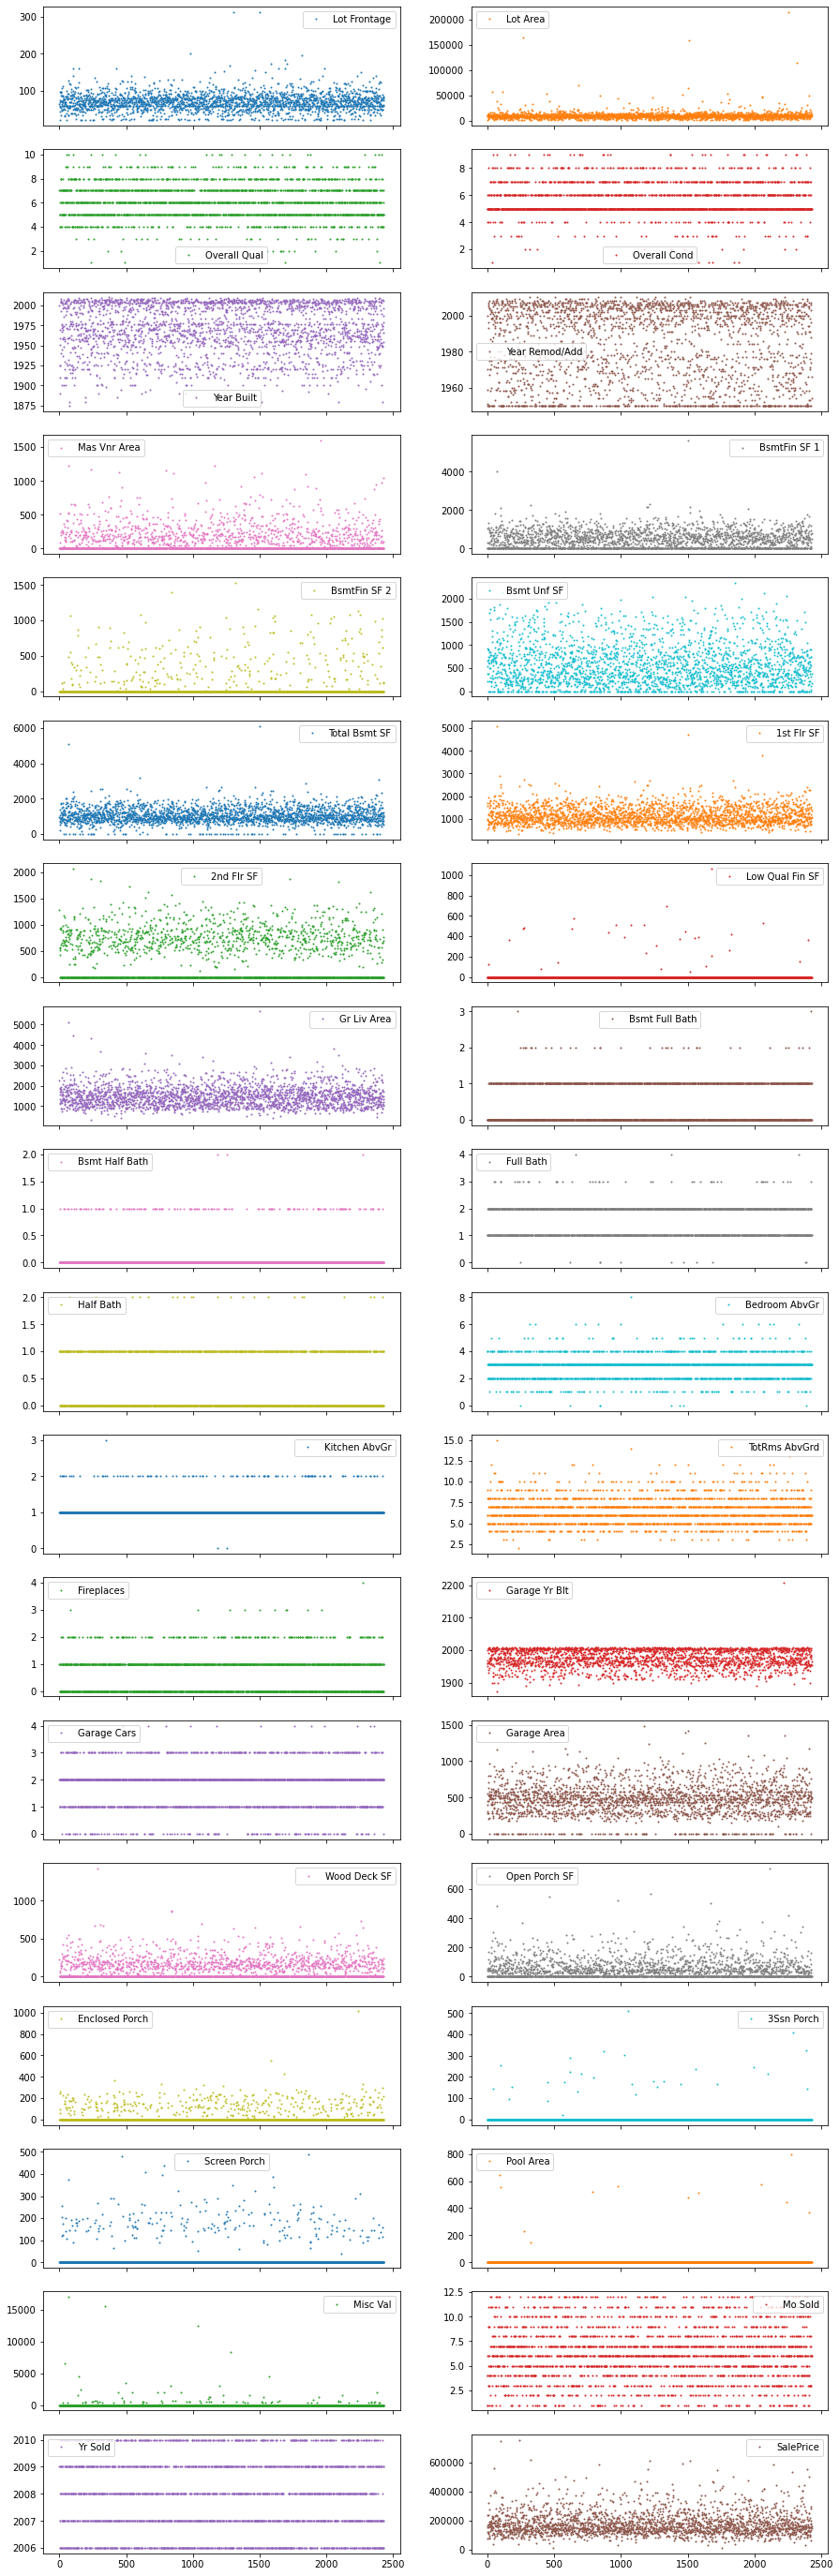

In [24]:
# identity all numerical columns
df_numerical = df.select_dtypes(exclude="object")

# plot all points from these variables
df_numerical.plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 50), markersize=2);

From the charts above it clear to see there is an error with a value in the Garage Year Built with an entry from > 2200.

In [25]:
# find the value
df['Garage Yr Blt'].sort_values(ascending=False).head(3)

2219    2207.0
1120    2010.0
506     2010.0
Name: Garage Yr Blt, dtype: float64

Safest assumption in this instance would be that the entry is a typo and the correct year is 2007. Verify this by reviewing when the property was built.

In [26]:
# locate entry and view year built
df.loc[2219,:]['Year Built']

2006

In [27]:
# edit the entry in the data
df.loc[2219,'Garage Yr Blt'] = 2007

Now reviewing categorical variables

In [28]:
# review amount of unique values within each category to ensure outside of the identifiers that each variables is correct category
unique_cat_values = df.select_dtypes(include="object").nunique().sort_values()
unique_cat_values.sort_values(ascending=False).head(10)

Order             2430
PID               2430
Neighborhood        28
MS SubClass         16
Exterior 2nd        16
Exterior 1st        16
Sale Type           10
Condition 1          9
BsmtFin Type 2       8
Condition 2          8
dtype: int64

Order/PID only unique identifiers as should be expected. Moving on to outliers

Deal with months of year in wrong format

In [29]:
numbers = np.arange(1,13)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

num_month = dict(zip(numbers, months))

df['Mo Sold'] = df['Mo Sold'].map(num_month)

In [30]:
df['Mo Sold']

0          April
1           June
2        January
3          April
4        January
          ...   
2425       March
2426    November
2427    November
2428        June
2429        June
Name: Mo Sold, Length: 2430, dtype: object

Overall condition/quality are categorical so change to object

In [31]:
# change dtype to object
df[['Overall Qual', 'Overall Cond']] = df[['Overall Qual', 'Overall Cond']].astype(object)

Use Feature engineering to create indicator variables on the YEAR categories

In [45]:
date = []
for column in df.columns:
    if "Year" in column:
        date.append(column)
    elif "Yr" in column:
        date.append(column)

In [47]:
df[date].describe()

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold
count,2430.000000,2430.000000,2430.000000,2430.000000
mean,1971.167490,1984.238683,1975.868313,2007.783539
std,30.207931,20.751163,26.676584,1.311843
min,1875.000000,1950.000000,1875.000000,2006.000000
25%,1954.000000,1966.000000,1958.250000,2007.000000
50%,1973.000000,1993.000000,1977.000000,2008.000000
75%,2000.000000,2003.000000,2001.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [50]:
# Year sold is simple as only 5 entries
df[['Yr Sold']] = df[['Yr Sold']].astype(object)

In [57]:
# based on 25 percentile thresholds label houses/garages 4 categories: very old, old, new, very new

def age(x):
    if x < 1954:
        return "very old"
    elif 1954 <= x < 1973:
        return "old"
    elif 1973 <= x < 2000:
        return "new"
    elif x >= 2000:
        return "very new"

In [63]:
df['Year Built'] = df['Year Built'].apply(lambda x: age(x))

In [69]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].apply(lambda x: age(x))

In [70]:
# for renovation just splitting into two categories "recently remodelled" or "not recently remodelled"

def remodel(x):
    if x <= 1984:
        return "recently remodelled"
    elif x > 1984:
        return "not recently remodelled"
    

In [ ]:
df['Year Remod/Add'] = df['Year Remod/Add'].apply(lambda x: remodel(x))